In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [18]:
import pandas as pd
df = pd.read_csv('Telco_Customer_Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [20]:
import numpy as np

categorical_cols = df.select_dtypes(include='object').columns.tolist()

if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')
if 'customerID' in categorical_cols:
    categorical_cols.remove('customerID')

for col in categorical_cols:
    df = pd.get_dummies(df, columns=[col], drop_first=True)

display(df.head())

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,0,34,56.95,1889.50,No,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,2,53.85,108.15,Yes,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,0,45,42.30,1840.75,No,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,Yes,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [21]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df.head())

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,-0.439916,-1.277445,-1.160323,-0.994194,No,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,-0.439916,0.066327,-0.259629,-0.173740,No,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,-0.439916,-1.236724,-0.362660,-0.959649,Yes,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,-0.439916,0.514251,-0.746535,-0.195248,No,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,-0.439916,-1.236724,0.197365,-0.940457,Yes,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [22]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
if 'TotalCharges' in df.columns:
    median_total_charges = df['TotalCharges'].median()
    df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)
else:

    print("Warning: 'TotalCharges' column not found, skipping NaN imputation.")

X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))  # binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)
display(df.isnull().sum())

,0
customerID,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0
TotalCharges,0
Churn,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0


In [24]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

display(X.head())
display(y.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.994194,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,-0.439916,0.066327,-0.259629,-0.173740,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,-0.439916,-1.236724,-0.362660,-0.959649,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,-0.439916,0.514251,-0.746535,-0.195248,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-0.439916,-1.236724,0.197365,-0.940457,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


,Churn
0,0
1,0
2,1
3,0
4,1


In [25]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy Score:", acc)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Confusion Matrix:
 [[582 454]
 [ 88 285]]
Accuracy Score: 0.6153300212916962


In [26]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=np.number).columns

print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)

Categorical features: Index([], dtype='object')
Numerical features: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [27]:
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)
display(X.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.994194,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,-0.439916,0.066327,-0.259629,-0.173740,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,-0.439916,-1.236724,-0.362660,-0.959649,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,-0.439916,0.514251,-0.746535,-0.195248,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-0.439916,-1.236724,0.197365,-0.940457,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [28]:
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

display(X.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.439916,-1.277445,-1.160323,-0.994242,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,-0.439916,0.066327,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,-0.439916,-1.236724,-0.362660,-0.959674,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,-0.439916,0.514251,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,-0.439916,-1.236724,0.197365,-0.940470,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [29]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7324 - loss: 0.5506 - val_accuracy: 0.7915 - val_loss: 0.4320
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7860 - loss: 0.4444 - val_accuracy: 0.7968 - val_loss: 0.4224
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7932 - loss: 0.4279 - val_accuracy: 0.7995 - val_loss: 0.4184
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8035 - loss: 0.4134 - val_accuracy: 0.8039 - val_loss: 0.4150
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7976 - loss: 0.4276 - val_accuracy: 0.8066 - val_loss: 0.4143
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8022 - loss: 0.4194 - val_accuracy: 0.8039 - val_loss: 0.4137
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8050 - loss: 0.4236 - val_accuracy: 0.8039 - val_loss: 0.4124
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7973 - loss: 0.4248 - val_accuracy: 0.

In [31]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy Score:", acc)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix:
 [[929 107]
 [160 213]]
Accuracy Score: 0.8105039034776437


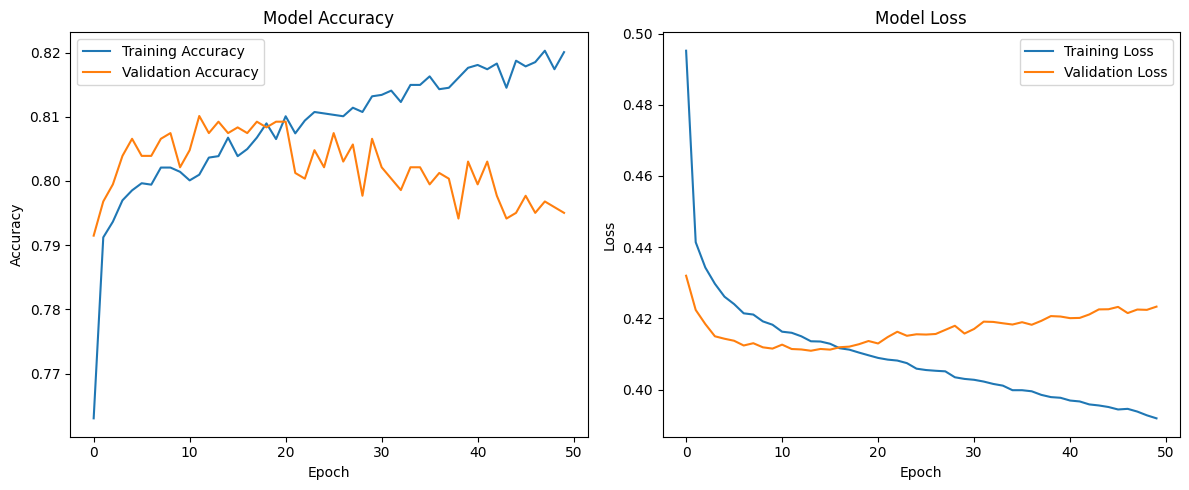

In [32]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()